<a href="https://colab.research.google.com/github/kumar-06/Credit_risk_customer/blob/main/Credit_Customer_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://www.dropbox.com/s/stqpohn45kwhw9l/archive%20%282%29.zip?dl=0

--2023-06-21 17:44:07--  https://www.dropbox.com/s/stqpohn45kwhw9l/archive%20%282%29.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/stqpohn45kwhw9l/archive%20%282%29.zip [following]
--2023-06-21 17:44:07--  https://www.dropbox.com/s/raw/stqpohn45kwhw9l/archive%20%282%29.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8b512e95188441167f4cabe56b.dl.dropboxusercontent.com/cd/0/inline/B-abdMjqvLkfpOjH2FSNdZ5M-JSjjB9pj4UTYcDz84-3Ge39DDKuN_W-oRfZtRuEfM5E7IO9F4oh8B3neBpXWczQFN_eOLJ4nH8iw155zknvYehZhNEktXjMA2vj96qXoXkkuVDtDoj-wb-jct3jEFLMiVPmlRNDBsAumscvDHbSHw/file# [following]
--2023-06-21 17:44:08--  https://uc8b512e95188441167f4cabe56b.dl.dropboxusercontent.com/cd/0/inline/B-abdMjqvLkfpOjH2FSNdZ5M-JSjjB9pj4UTYcDz84-3Ge39

In [3]:
!unzip archive\ \(2\).zip\?dl\=0

Archive:  archive (2).zip?dl=0
  inflating: credit_customers.csv    


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("credit_customers.csv")

In [6]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [7]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [8]:
df.shape

(1000, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [11]:
df.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [12]:
for column in df.columns:
  unique=df[column].nunique()
  print(f"{column}:{unique}")

checking_status:4
duration:33
credit_history:5
purpose:10
credit_amount:921
savings_status:5
employment:5
installment_commitment:4
personal_status:4
other_parties:3
residence_since:4
property_magnitude:4
age:53
other_payment_plans:3
housing:3
existing_credits:4
job:4
num_dependents:2
own_telephone:2
foreign_worker:2
class:2


duration                     Axes(0.125,0.798085;0.133621x0.0819149)
credit_amount             Axes(0.285345,0.798085;0.133621x0.0819149)
installment_commitment     Axes(0.44569,0.798085;0.133621x0.0819149)
residence_since           Axes(0.606034,0.798085;0.133621x0.0819149)
age                       Axes(0.766379,0.798085;0.133621x0.0819149)
existing_credits             Axes(0.125,0.699787;0.133621x0.0819149)
num_dependents            Axes(0.285345,0.699787;0.133621x0.0819149)
dtype: object

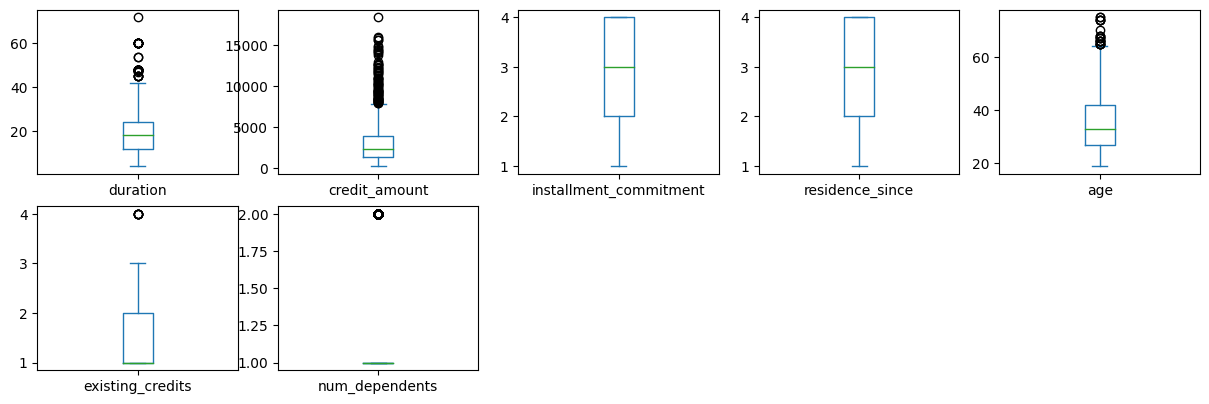

In [13]:
df.plot(kind="box",subplots=True,layout=(8,5),figsize=(15,20))

In [14]:
cat=df.select_dtypes(include=[np.number])

In [15]:
cat

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0
...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,31.0,1.0,1.0
996,30.0,3857.0,4.0,4.0,40.0,1.0,1.0
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0
998,45.0,1845.0,4.0,4.0,23.0,1.0,1.0


In [16]:
df_categorical=df.select_dtypes(exclude=[np.number])

In [17]:
df_categorical

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes,good
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes,bad
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes,good
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes,good
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,existing paid,furniture/equipment,<100,4<=X<7,female div/dep/mar,none,real estate,none,own,unskilled resident,none,yes,good
996,<0,existing paid,used car,<100,1<=X<4,male div/sep,none,life insurance,none,own,high qualif/self emp/mgmt,yes,yes,good
997,no checking,existing paid,radio/tv,<100,>=7,male single,none,car,none,own,skilled,none,yes,good
998,<0,existing paid,radio/tv,<100,1<=X<4,male single,none,no known property,none,for free,skilled,yes,yes,bad


In [18]:
df_categorical.shape

(1000, 14)

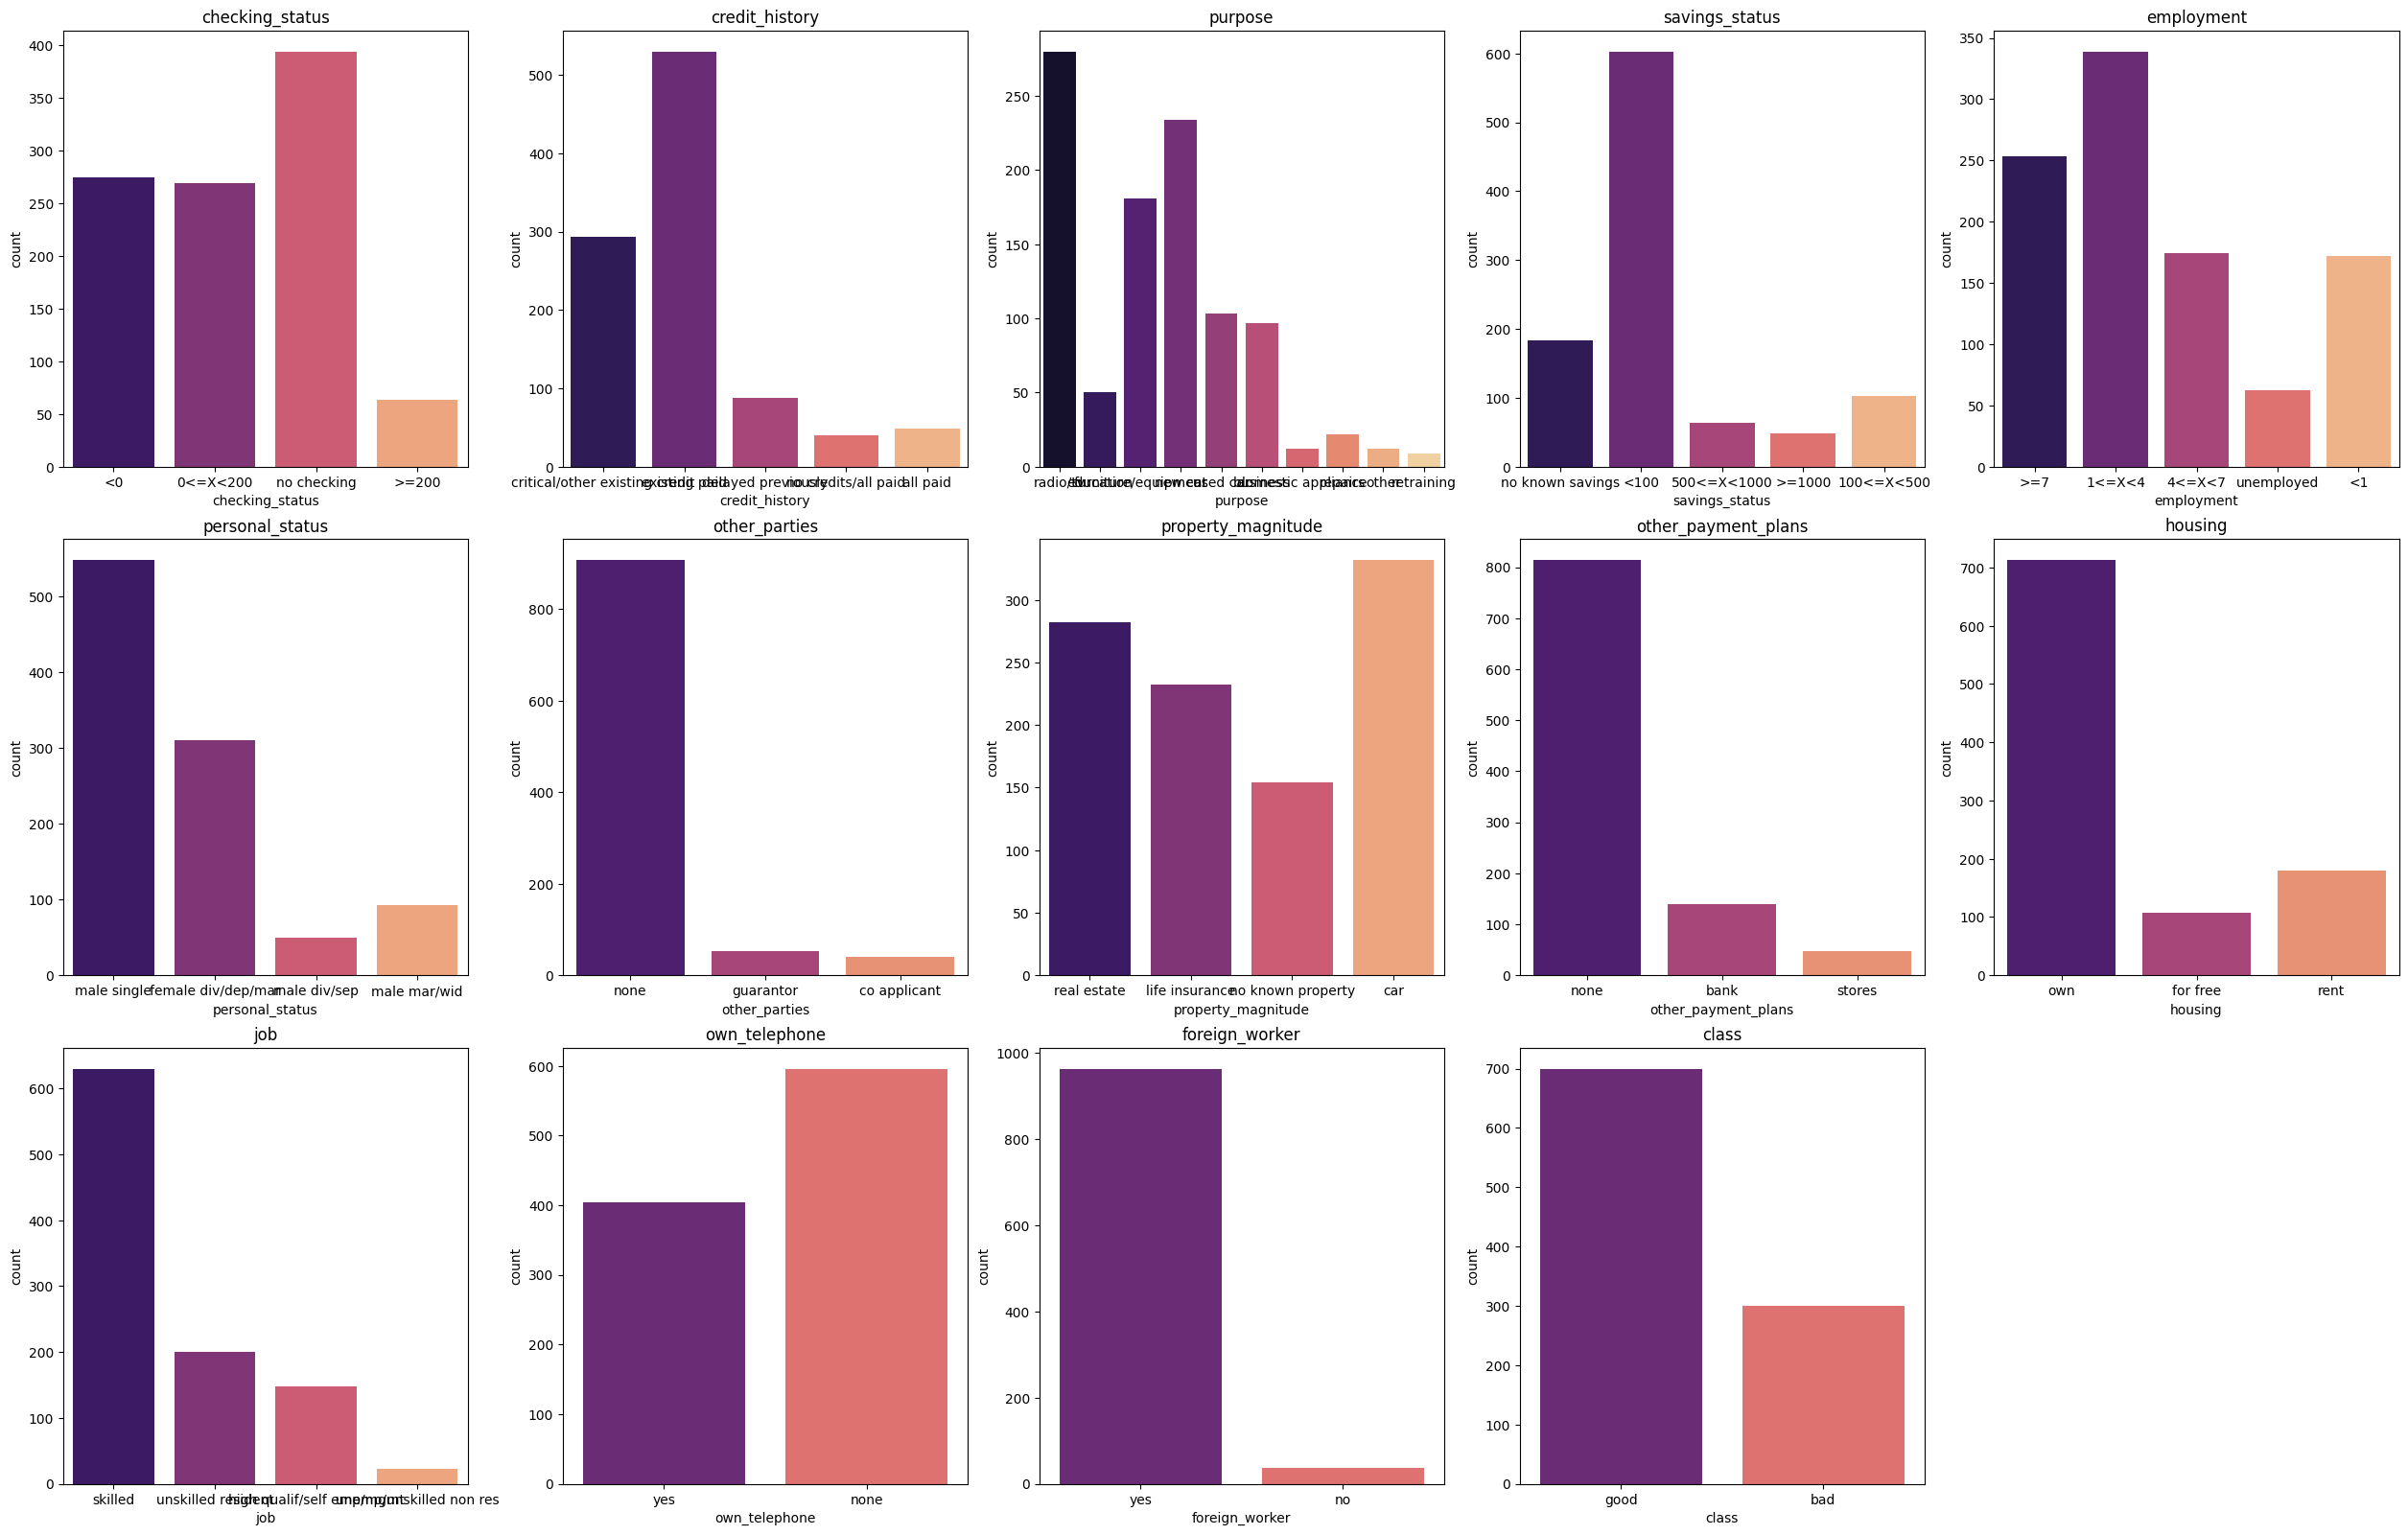

In [19]:
plt.figure(figsize=(25,25),layout='constrained')
i=0
for column in df_categorical.columns:
    plt.subplot(5,5,i+1)
    i=i+1
    sns.countplot(data=df_categorical,x=df_categorical[column],palette='magma',)
    plt.title(column)
plt.show()

<ipython-input-20-b8d62df54ca4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cat,x=cat[column],shade=True)
<ipython-input-20-b8d62df54ca4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cat,x=cat[column],shade=True)
<ipython-input-20-b8d62df54ca4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cat,x=cat[column],shade=True)
<ipython-input-20-b8d62df54ca4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cat,x=cat[column],shade=True)
<ipython-input-20-b8d62df54ca4>:7: Futur

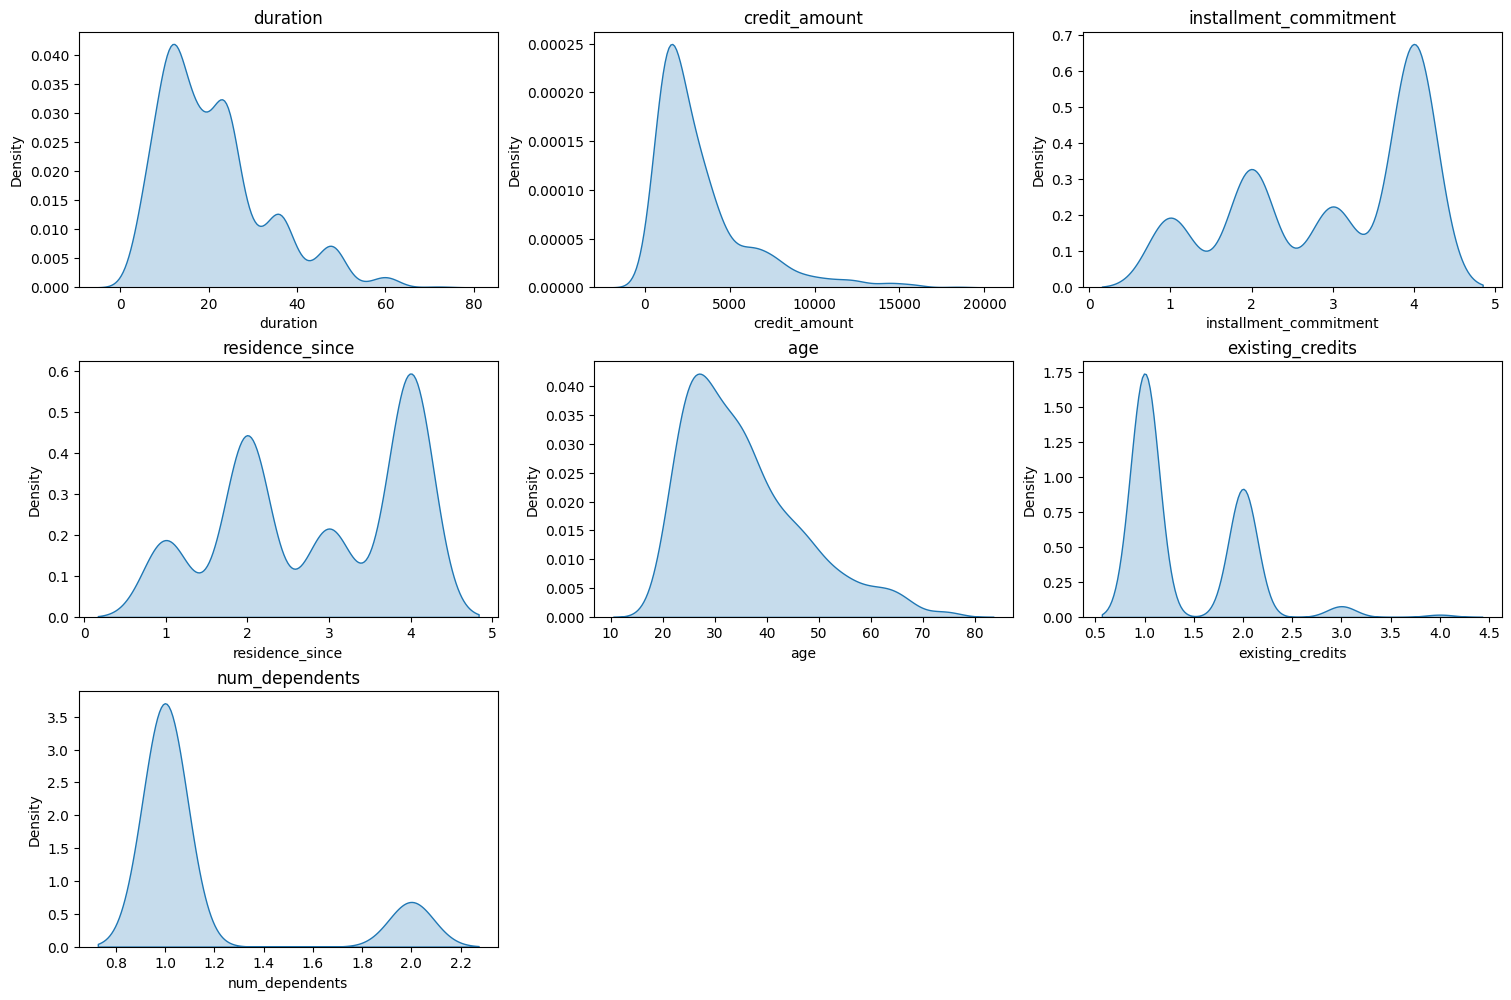

In [20]:
from ipywidgets import Layout
plt.figure(figsize=(15,15),layout='constrained')
i=0
for column in cat.columns:
  plt.subplot(5,3,i+1)
  i=i+1
  sns.kdeplot(data=cat,x=cat[column],shade=True)
  plt.title(column)
plt.show()

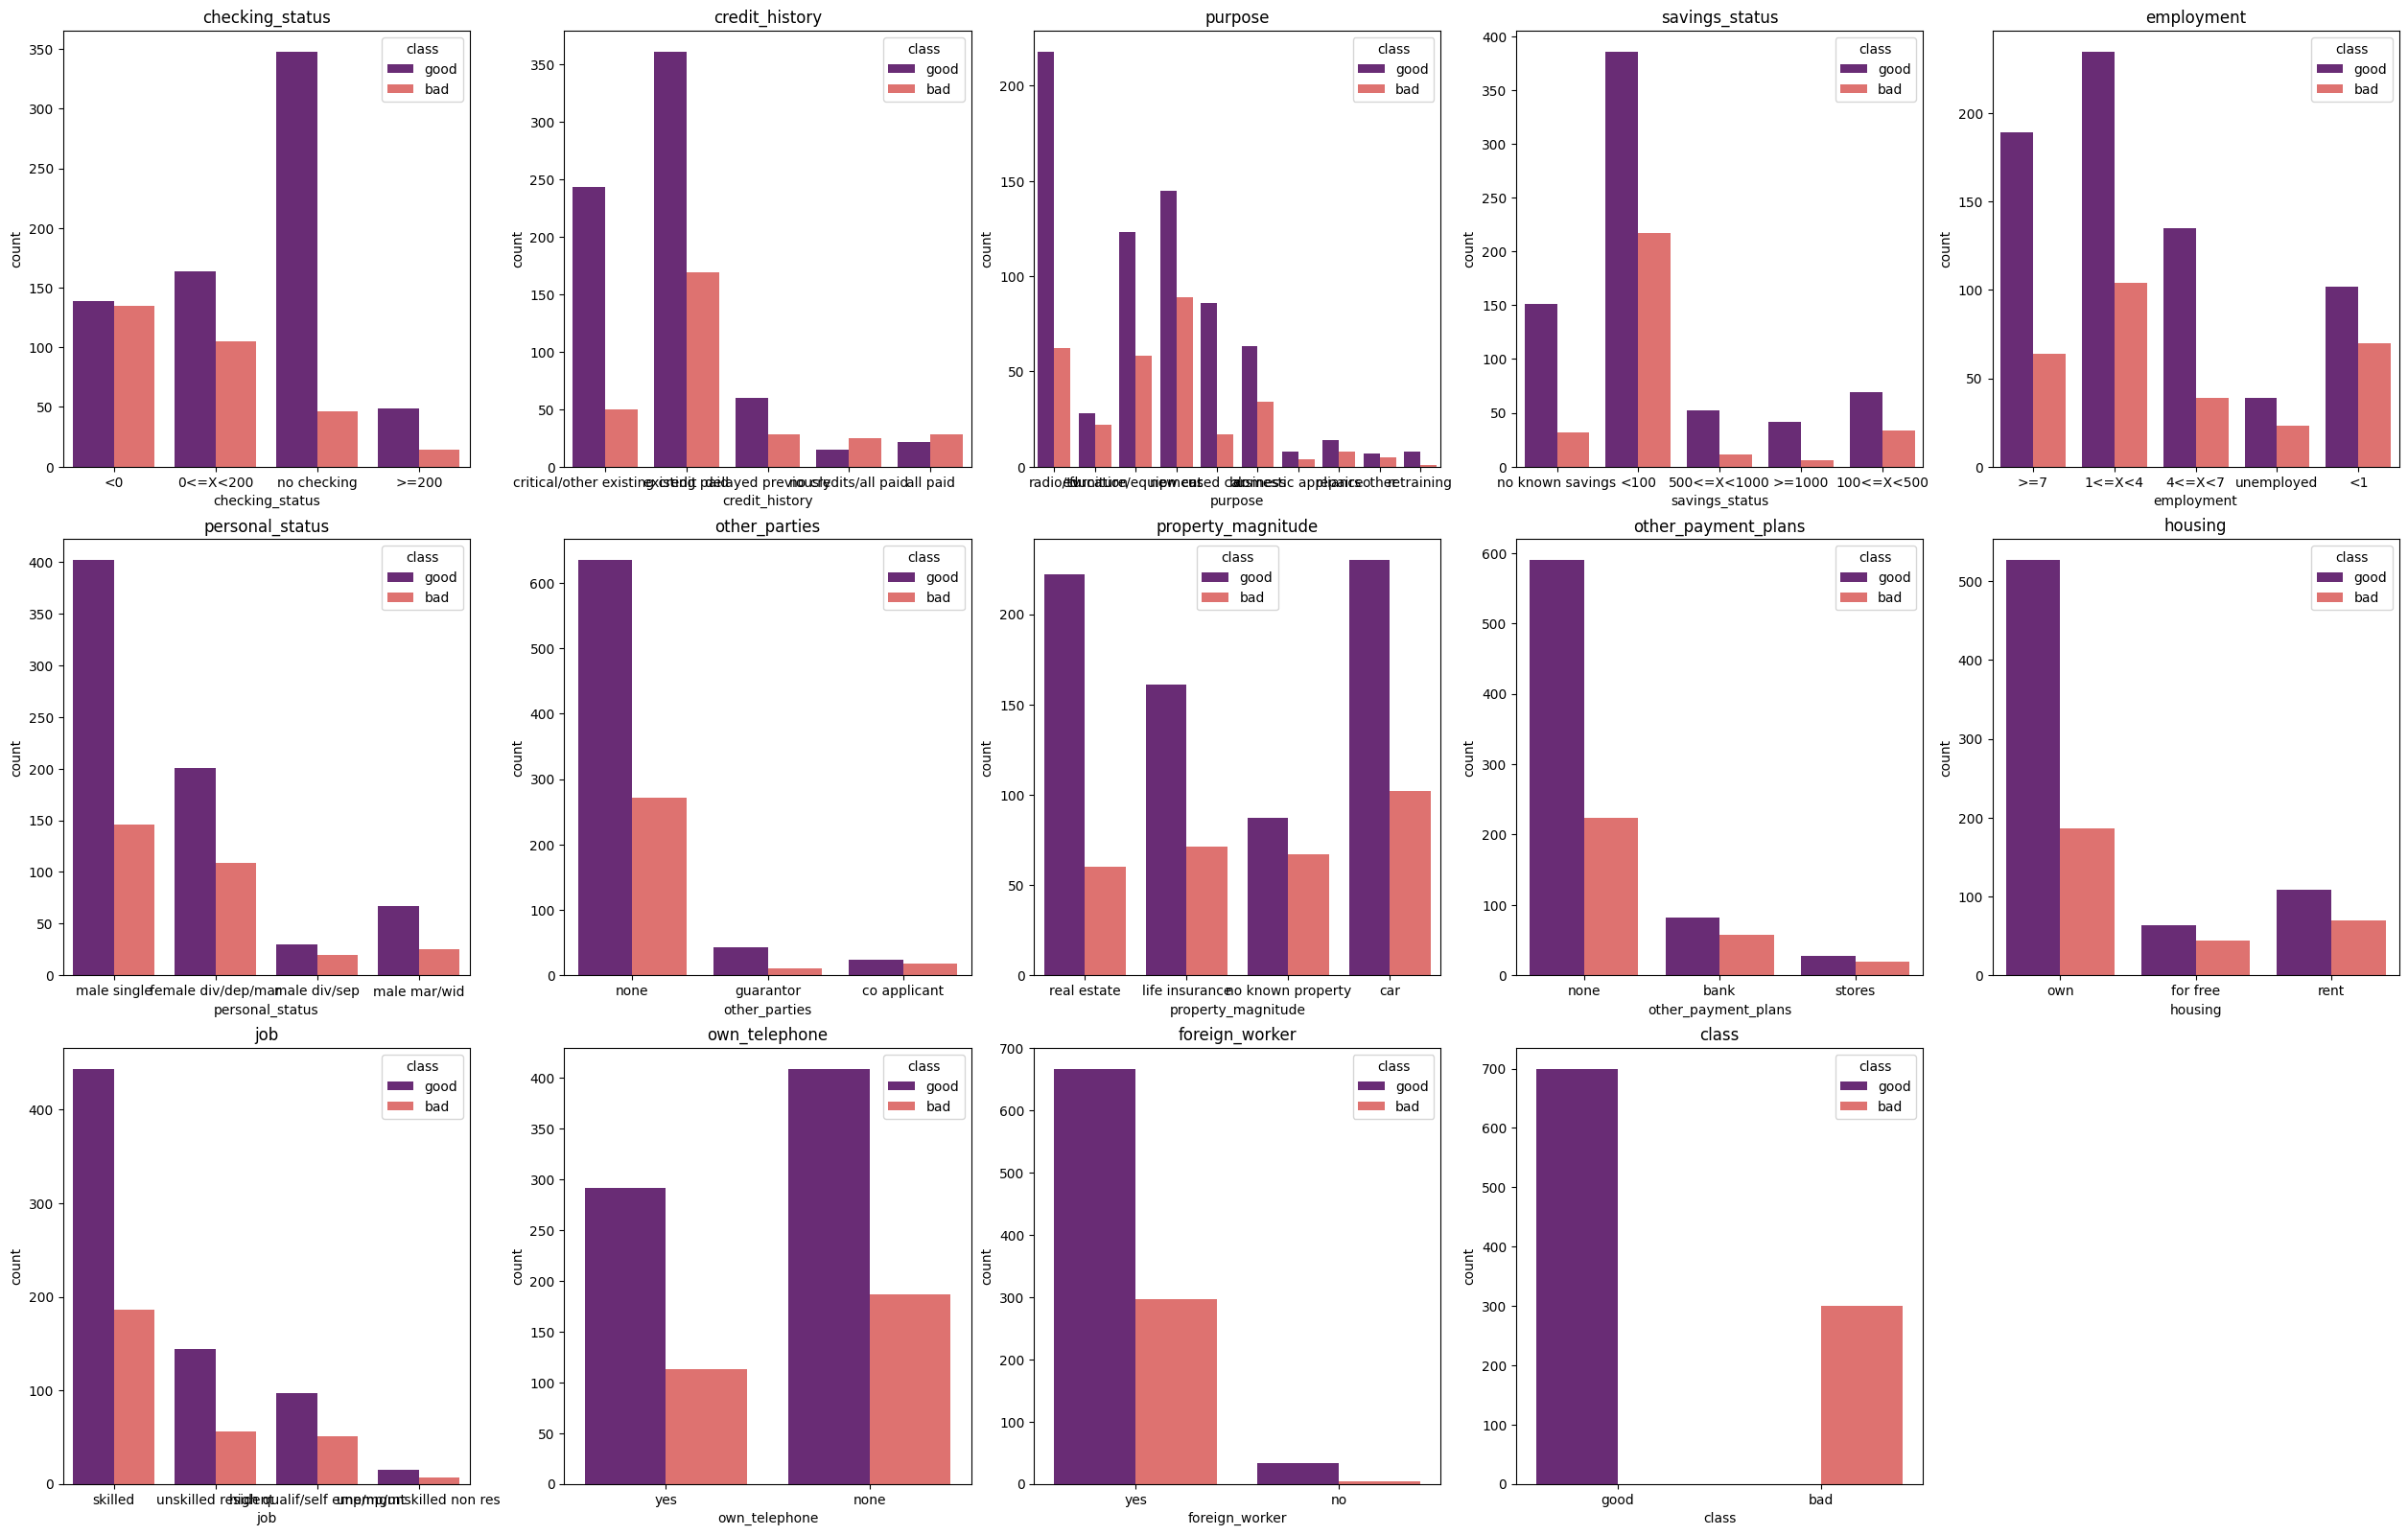

In [21]:
plt.figure(figsize=(25,25),layout='constrained')
i=0
for column in df_categorical.columns:
    plt.subplot(5,5,i+1)
    i=i+1
    sns.countplot(data=df_categorical,x=df_categorical[column],hue='class',palette='magma',)
    plt.title(column)
plt.show()

In [26]:
 from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [23]:
df_categorical_encoded=pd.get_dummies(df_categorical,drop_first=True)
df_categorical_encoded.head()

,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,...,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes,class_good
0,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,1
1,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
2,0,0,1,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,1
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,1
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [24]:
print(df_categorical_encoded.shape)

(1000, 42)


In [25]:
df_categorical.shape

(1000, 14)

In [40]:
for i in df_categorical.columns:
  df[i+'_encoded']=LabelEncoder().fit_transform(df_categorical[i])
num=df.select_dtypes(include=[np.number])
scl=pd.DataFrame(MinMaxScaler().fit_transform(num.to_numpy()),columns=num.columns)
scl.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_encoded,credit_history_encoded,purpose_encoded,...,employment_encoded,personal_status_encoded,other_parties_encoded,property_magnitude_encoded,other_payment_plans_encoded,housing_encoded,job_encoded,own_telephone_encoded,foreign_worker_encoded,class_encoded
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.333333,0.25,0.666667,...,0.75,1.0,1.0,1.000000,0.5,0.5,0.333333,1.0,1.0,1.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.000000,0.75,0.666667,...,0.00,0.0,1.0,1.000000,0.5,0.5,0.333333,0.0,1.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1.000000,0.25,0.222222,...,0.25,1.0,1.0,1.000000,0.5,0.5,1.000000,0.0,1.0,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.333333,0.75,0.333333,...,0.25,1.0,0.5,0.333333,0.5,0.0,0.333333,0.0,1.0,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.333333,0.50,0.444444,...,0.00,1.0,1.0,0.666667,0.5,0.0,0.333333,0.0,1.0,0.0


In [41]:
scl.shape

(1000, 21)

In [44]:
x=scl.drop('class_encoded',axis=1)
y=scl["class_encoded"]

In [46]:
x.head()


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_encoded,credit_history_encoded,purpose_encoded,savings_status_encoded,employment_encoded,personal_status_encoded,other_parties_encoded,property_magnitude_encoded,other_payment_plans_encoded,housing_encoded,job_encoded,own_telephone_encoded,foreign_worker_encoded
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.333333,0.25,0.666667,1.0,0.75,1.0,1.0,1.000000,0.5,0.5,0.333333,1.0,1.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.000000,0.75,0.666667,0.5,0.00,0.0,1.0,1.000000,0.5,0.5,0.333333,0.0,1.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1.000000,0.25,0.222222,0.5,0.25,1.0,1.0,1.000000,0.5,0.5,1.000000,0.0,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.333333,0.75,0.333333,0.5,0.25,1.0,0.5,0.333333,0.5,0.0,0.333333,0.0,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.333333,0.50,0.444444,0.5,0.00,1.0,1.0,0.666667,0.5,0.0,0.333333,0.0,1.0


In [47]:
# MODEL BUILDING
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# MODEL EVALUATION
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline
from time import time

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [50]:
# Logistic Regreesion Model
def model_lr(x_train,x_test,y_train,y_test):
    global acc_lr,f1_lr

    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_lr=confusion_matrix(y_test,y_pred)
    acc_lr=accuracy_score(y_test,y_pred)
    f1_lr=f1_score(y_test,y_pred)
    clf_lr=classification_report(y_test,y_pred)

    print('*********** Logistic Regression***********')
    print('\n')
    print('Accuracy : ',acc_lr)
    print('F1 Score : ',f1_lr)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_lr)
    print(10*'=====')
    print('Classification Report :\n',clf_lr)
    print(30*'========')

 # Naive Bayes Model
def model_nb(x_train,x_test,y_train,y_test):
    global acc_nb,f1_nb

    lr=GaussianNB()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_nb=confusion_matrix(y_test,y_pred)
    acc_nb=accuracy_score(y_test,y_pred)
    f1_nb=f1_score(y_test,y_pred)
    clf_nb=classification_report(y_test,y_pred)

    print('***********Gaussian Naive Bayes***********')
    print('\n')
    print('Accuracy : ',acc_nb)
    print('F1 Score : ',f1_nb)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_nb)
    print(10*'=====')
    print('Classification Report :\n',clf_nb)
    print(30*'========')

# Decision Tree Model
def model_dt(x_train,x_test,y_train,y_test):
    global acc_dt,f1_dt

    lr=DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_dt=confusion_matrix(y_test,y_pred)
    acc_dt=accuracy_score(y_test,y_pred)
    f1_dt=f1_score(y_test,y_pred)
    clf_dt=classification_report(y_test,y_pred)

    print('***********Decision Tree***********')
    print('\n')
    print('Accuracy : ',acc_dt)
    print('F1 Score : ',f1_dt)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_dt)
    print(10*'=====')
    print('Classification Report :\n',clf_dt)
    print(30*'========')

# K Nearest Neighbor Model
def model_knn(x_train,x_test,y_train,y_test):
    global acc_knn,f1_knn

    lr=KNeighborsClassifier()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_knn=confusion_matrix(y_test,y_pred)
    acc_knn=accuracy_score(y_test,y_pred)
    f1_knn=f1_score(y_test,y_pred)
    clf_knn=classification_report(y_test,y_pred)

    print('***********K Nearest Neighbor***********')
    print('\n')
    print('Accuracy : ',acc_knn)
    print('F1 Score : ',f1_knn)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_knn)
    print(10*'=====')
    print('Classification Report :\n',clf_knn)
    print(30*'========')

# Random Forest Model
def model_rf(x_train,x_test,y_train,y_test):
    global acc_rf,f1_rf

    lr=RandomForestClassifier()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_rf=confusion_matrix(y_test,y_pred)
    acc_rf=accuracy_score(y_test,y_pred)
    f1_rf=f1_score(y_test,y_pred)
    clf_rf=classification_report(y_test,y_pred)

    print('***********Random Forest***********')
    print('\n')
    print('Accuracy : ',acc_rf)
    print('F1 Score : ',f1_rf)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_rf)
    print(10*'=====')
    print('Classification Report :\n',clf_rf)
    print(30*'========')


In [51]:
##MODEL EVALUATION##

In [53]:
# Model Evaluation
model_lr(x_train,x_test,y_train,y_test)
model_nb(x_train,x_test,y_train,y_test)
model_dt(x_train,x_test,y_train,y_test)
model_knn(x_train,x_test,y_train,y_test)
model_rf(x_train,x_test,y_train,y_test)

*********** Logistic Regression***********


Accuracy :  0.735
F1 Score :  0.8273615635179153
Confusion Matrix :
 [[ 20  39]
 [ 14 127]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.59      0.34      0.43        59
         1.0       0.77      0.90      0.83       141

    accuracy                           0.73       200
   macro avg       0.68      0.62      0.63       200
weighted avg       0.71      0.73      0.71       200

***********Gaussian Naive Bayes***********


Accuracy :  0.725
F1 Score :  0.8070175438596492
Confusion Matrix :
 [[ 30  29]
 [ 26 115]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.54      0.51      0.52        59
         1.0       0.80      0.82      0.81       141

    accuracy                           0.73       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.72      0.72      0.72       200

***********Decision Tr

In [54]:
# Creating tabular format for better comparison
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regreesion','Gaussian NB','Decision Tree','KNN','Random Forest'])
tbl['Accuracy']=pd.Series([acc_lr,acc_nb,acc_dt,acc_knn,acc_rf])
tbl['F1_Score']=pd.Series([f1_lr,f1_nb,f1_dt,f1_knn,f1_rf])
tbl.set_index('Model')

,Accuracy,F1_Score
Model,,
Logistic Regreesion,0.735,0.827362
Gaussian NB,0.725,0.807018
Decision Tree,0.685,0.777385
KNN,0.680,0.780822
Random Forest,0.765,0.845902
